# IFT 6758 - Assignment 4

### Model Interpretability, Explainability, Feature Selection and Feature Engineering

**This homework has the objective of giving you more practical experience on the subjects of model interpretability, feature selection and feature engineering.**

Evaluation on this notebook:

- Outputs and graphs
- Printed results from function execution
- Short answer questions


In [19]:
import pandas as pd
import numpy as np
import eli5
from sklearn.ensemble import RandomForestRegressor
from hw5 import *

c:\Users\samyb\miniconda3\envs\gilet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Part 1: Model Interpretability and Explainability

## 1. Load Data

### Load the readmissions-dataset

We will start by loading our dataset and checking a small sample.

In [20]:
path = "data/hospital.csv"
raw_df = load_data(path)

In [21]:
# check to see a sample of 5 players
np.random.seed(0)
raw_df.sample(5)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,is_readmitted
14149,1,36,1,20,2,0,0,5,True,False,...,True,False,True,True,True,True,True,False,True,True
8946,3,37,2,37,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,False
22378,2,68,0,16,1,0,5,7,True,False,...,True,True,True,True,True,True,True,True,False,False
12162,12,76,1,30,0,0,2,9,True,False,...,True,False,True,True,True,True,True,False,True,True
4879,4,19,3,9,0,0,0,9,True,False,...,True,True,True,True,True,True,True,True,False,True


We can check the names of all the columns in our dataset:

In [22]:
# check the names of the 65 columns in our dataset
raw_df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

We can also check their dtypes:

In [23]:
# check to see the dtypes of the raw dataframe
raw_df.dtypes

time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
                              ...  
metformin-rosiglitazone_No     bool
metformin-pioglitazone_No      bool
change_No                      bool
diabetesMed_Yes                bool
is_readmitted                  bool
Length: 65, dtype: object

Here you have a quick overview on how to interpret each column name:

-  The column with the name `is_readmitted` is our prediction target. This is what our model should be able to classify correctly. Notice that the values of this column are Boolean and that we will need to map them to 1 and 0 before training our model.
- The columns with the word `diag` indicate the diagnostic code of the illness or illnesses the patient was admitted with. For example, `diag_1_428` means the doctor said their first illness diagnosis is number "428".  These codes could be searched in a medical codebook, but without more medical background it wouldn't mean anything to us anyway.
- The columns with names like `glimepiride_No` mean that the patient did not have the medicine `x`. In this example, the medicine is `glimepiride`. If this feature had a value of False, then the patient did take the drug `glimepiride`
- Features whose names begin with `medical_specialty` describe the specialty of the doctor seeing the patient. The values in these fields are all `True` or `False`.

We check if we have empty values in our dataset.

In [24]:
# Check if we have na values
raw_df.isna().any(axis=1).sum() 

np.int64(0)

Finally, we will encode our prediction target. Complete the `encode_target_column()` method in `solutions.py`.

In [25]:
# TODO: complete the method encode_target_column() in solutions.py
df = encode_target_column(raw_df)
df.head(5)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,is_readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


## 2. Model Interpretability
Let's imagine that we have chosen a simple model that predicts if a patient will be readmitted to the hospital, but the doctors (our main stakeholders) say they don't know how to evaluate a model, and they'd like us to show them some evidence the model is doing something in line with their medical intuition. 

They are very busy saving lives, and they don't have time for overcomplicated graphics or reports. We need to produce a representation that condenses our model overview in 1 or 2 graphics.

First, we will need to prepare our dataset for model training and model evaluation. We will use the `split_data()` function from our `hw4.py` file to split our dataset into X_train, y_train, X_val and y_val. We are rookie data scientist, and we believe that all the features are useful in predicting if a patient will be readmitted (I know you know that this is wrong, but let's play along for the sake of the exercise).

In [26]:
# Split the dataset into training and validation sets.
X_train, X_val, y_train, y_val = split_data(df, "is_readmitted")

The model that we have chosen is a `Random Forest model`. We will train and test our model on the splits from our previous cell. Here you will have to complete the `train_random_forest()` method of the `hw4.py` file.

In [27]:
# TODO: complete the method train_random_forest() in hw4.py
firstModel = train_random_forest(X_train, y_train)

We are new in doing medical data science, but we know that a classification report could help us to show that the model is doing its job. Here you will have to complete the `evaluate_model()` method from `hw4.py`, as it will help us to get the accuracy of our model and our classification report.

In [28]:
# TODO: complete the method evaluate_model() in hw4.py
acc, report = evaluate_model(firstModel, X_val,y_val)
print(f"The accuracy of our model is: {acc}")
print(report)

The accuracy of our model is: 0.6116
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      2731
           1       0.59      0.47      0.53      2269

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.61      0.61      5000



### 2.1 Feature Importance

Ouch! We didn't do too well. However, Data Science is a continuous improvement process, and we know that we could improve this model if we understand how our features interact with our model. 

We keep it cool, and we remember that we can interrogate our model to identify the features that have the highest impact on the prediction. There are multiple ways to do this, but we decide to work with `permutation importance` (it is fast to compute, widely used and understood, and it is consistent with properties we would want a feature importance measure to have). 

Permutation importance is calculated after a model has been fitted. We won't change the model or change what predictions we'd get for a given set of features. This measure will help us to answer the question: If I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data? The intuition behind this is that the model's accuracy especially suffers if we shuffle a column that the model relied on heavily for predictions.

Here you will have to complete the method `permutation_importance()`, which will allow us to compute the permutation importance of the used features. Then we will show them with the help of the `eli5.show_weights()` function.

In [29]:
# TODO: complete the method calculate_permutation_importance in hw4.py
feature_names = X_val.columns.tolist()
perm = calculate_permutation_importance(firstModel, X_val, y_val)

In [30]:
eli5.show_weights(perm, feature_names = X_val.columns.tolist())

Weight,Feature
0.0460 ± 0.0117,number_inpatient
0.0074 ± 0.0052,number_emergency
0.0068 ± 0.0041,number_outpatient
0.0039 ± 0.0055,num_lab_procedures
0.0030 ± 0.0021,diag_1_428
0.0024 ± 0.0036,payer_code_MC
0.0022 ± 0.0019,diag_2_250
0.0021 ± 0.0037,change_No
0.0016 ± 0.0029,diag_2_428
0.0016 ± 0.0037,diag_3_250


**Question 1**

1-. Which seems to be the most important feature?

The most important feature seems to be number_inpatient since it is at the top of the list. This means that random permutations of the column affected the accuracy of the model the most.

---------------------------------------------------------------


**Interpreting Permutation Importance**

The values towards the top are the most important features, and those towards the bottom matter least.

The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric). The number after the ± measures how performance varied from one-reshuffling to the next.

It is possible to see negative values for permutation importance. In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate.

----------------------------------------------------

 ### 2.2 Partial Dependence Plots
 
 We show our findings to the doctors. They don't seem too impressed by the performance of our model, but they would like to know more about the feature that the model identified as the most important. We will create a graph for them that shows how the top feature affects the model's predictions. To do this you will have to complete the `plot_partial_dependece()` method from `solution.py`, which will help us display a partial dependence plot.

 While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions. If you are familiar with linear or logistic regression models, partial dependence plots can be interpreted similarly to the coefficients in those models. Though, partial dependence plots on sophisticated models can capture more complex patterns than coefficients from simple models.

 Partial dependence plots are calculated after a model has been fit. The model is fit on real data that has not been artificially manipulated in any way.

C:\Users\vmalik\AppData\Roaming\Python\Python313\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 6 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


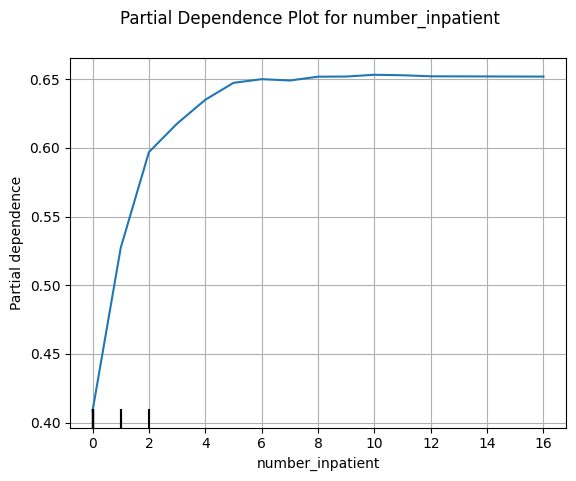

In [13]:
# TODO: complete the method plot_partial_dependence() in hw4.py and assing the name of the most important feature that we found to the topFeature variable.
topFeature="number_inpatient"
plot_partial_dependence(firstModel,X_val,topFeature)

We show our plot to the doctors, and they think it's a good sign that increasing the number of inpatient procedures leads to increased predictions.  But they can't tell from this plot whether that change in the plot is big or small. They'd like us to create something similar for `time_in_hospital` to see how that compares. Let's see how it goes:

C:\Users\vmalik\AppData\Roaming\Python\Python313\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


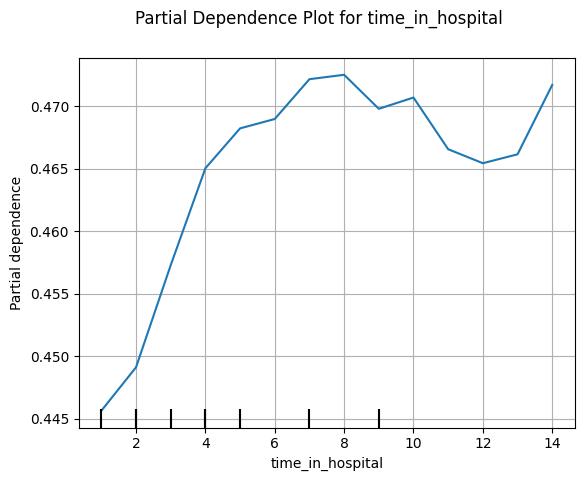

In [14]:
plot_partial_dependence(firstModel,X_val,"time_in_hospital")

It seems like `time_in_hospital` doesn't matter at all.  The difference between the lowest value on the partial dependence plot and the highest value is about 5%.

If that is what our model concluded, the doctors will believe it. But to them it seems so low. Is it possible that the data is wrong, or is our model doing something more complex than they expect?  

They'd like us to show them the raw readmission rate for each value of `time_in_hospital` to see how it compares to the partial dependence plot.

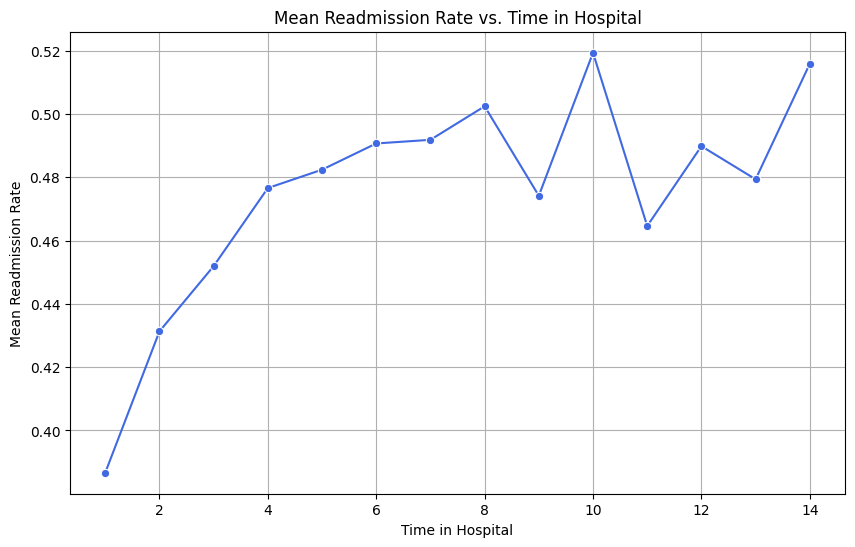

In [15]:
# TODO: complete the method plot_mean_readmission_vs_time() in hw4.py.
plot_mean_readmission_vs_time(X_train,y_train)

## 3. Model Explainability (Bonus)

### 3.1 SHAP Values

After watching this the doctors are convinced we have the right data, and the model overview looked reasonable for a first try.  It's time to turn this into a finished product they can use and test (in real life this wouldn't happen as models have to pass a series of strict controls and regulations before being used in real life medical settings, but the idea here is to show you how to use these tools and be familiar enough to apply them in our course project). Specifically, the hospital wants you to create a function `main_factors()` that does the following:
- Takes a single row with patient data (of the same format we have as our processed data)
- Creates a visualization showing what features of that patient increased their risk of readmission, what features decreased it, and how much those features mattered.

It's not important to show every feature with every miniscule impact on the readmission risk.  It's fine to focus on only the most important features for that patient.

--------------------------------------

So far, we have worked with some techniques to extract general insights from a machine learning model. But what happens if we want to break down how the model works for an individual prediction?

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature. Where could you use this? Imagine the following scenarios:

    - A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection (We are starting to see more regulations that demand model explicability around this type of ML applications).
    - A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions (this is also important from a regulatory perspective, as healthcare providers must provide clear evidence on how a patient was diagnosed and the reason behind a specific treatment pathway).


**How do SHAP values work?**

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value. SHAP values do this in a way that guarantees a nice property. Specifically, you decompose a prediction with the following equation:

sum(SHAP values for all features) = pred_for_reasmission - pred_for_baseline_values

That is, the SHAP values of all features sum up to explain why my prediction was different from the baseline. This helps us to explain why the model identified a patient for readmission or not.

--------------------------------------------------------------------------

In [ ]:
sample_patient = X_val.iloc[0].astype(float)

In [ ]:
# TODO: complete the method main_factors() in hw4.py.
main_factors(firstModel,sample_patient)

--------------------------------------------------


**How do you interpret this?**

Feature values causing increased predictions are in red, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue.

If you subtract the length of the blue bars from the length of the red bars, it equals the distance from the base value to the output.

There is some complexity to the technique, to ensure that the baseline plus the sum of individual effects adds up to the prediction (which isn't as straightforward as it sounds). We won't go into that detail here since it isn't critical for using the technique. This blog post has a longer theoretical explanation: https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d

----------------------------------------

**Bonus - Question**

Bonus: How would you interpret the SHAP value visualization that we have obtained? What risk factors are increasing the rate of readmission and which ones are actually decreasing it?

*Your answer here*

# Part 2: Feature Selection and Feature Engineering

In this second part of the assignment, we will explore the subjects of feature selection an feature engineering. We will be working with a New York city taxi fare prediction dataset. This dataset is more manageable than our previous dataset and it will allow us to do some feature selection and feature engineering on it (without the need to have an advanced domain knowledge on the subject). However, we will take advantage of the functions implemented on the first part of the assignment to speed up the analysis process, aid the selection of the most relevant features and to identify the impact of creating a new feature.

## 1. Outlier Handling and Feature Selection



### 1.1 Loading the Dataset

In [8]:
data = load_data("data/ny_taxi.csv")

In [9]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [11]:
# Check if we have na values
data.isna().any(axis=1).sum() 

np.int64(0)

### 1.2 Outlier Handling and Feature Selection

We will do some outlier detection and removal. To do so, you will have to complete the function `remove_outliers_iqr()` in `hw4.py`. This function will apply the IQR (Interquartile Range) Method for outlier detection. The IQR method defines outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the 25th and 75th percentiles, respectively.

Here we will decide to work with numerical features associated to the pickup and drop-off positions and the number of passengers, so we will ignore the `key` and `pickup_datetime` columns.

In [12]:
# The features that we will scan for outliers:
base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'passenger_count']

We will use our `remove_outlier_iqr()` function.

In [13]:
# TODO: complete the method remove_outliers_iqr() in hw4.py.
clean_data = remove_outliers_iqr(data,base_features,"fare_amount")

**Question 2**

2-. What are the advantages and disadvantages of the IQR method that we have implemented?

*Your answer here*

In [14]:
clean_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
1,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
2,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
3,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
4,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0


In [15]:
clean_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000
mean,9.074523,-73.981888,40.752408,-73.980463,40.752875,1.258946
std,4.914401,0.016210,0.021810,0.017342,0.023322,0.546451
min,-5.000000,-74.029201,40.686204,-74.032472,40.683685,0.000000
25%,5.700000,-73.992916,40.737635,-73.991993,40.737919,1.000000
50%,8.000000,-73.982867,40.753253,-73.981792,40.754234,1.000000
75%,11.000000,-73.971498,40.766750,-73.969945,40.767696,1.000000
max,110.000000,-73.929810,40.816026,-73.922337,40.818698,3.000000


Now we will split our dataset into train and validation set. We will only work with the columns stated in the `selected_columns` variable. 

In [16]:
selected_columns = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

X_train_2, X_val_2, y_train_2, y_val_2 = split_data(clean_data[selected_columns], "fare_amount")

In [17]:
X_train_2.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1060,-74.005727,40.740298,-73.958997,40.780615,2.0
19434,-73.996853,40.742421,-73.991159,40.731472,1.0
27360,-74.009862,40.714840,-73.964885,40.754980,1.0
6956,-73.965820,40.762610,-73.946780,40.772190,1.0
17614,-73.952712,40.776467,-73.985088,40.727432,1.0


In [18]:
y_train_2.head()

1060     15.0
19434     6.5
27360    19.0
6956      8.0
17614    16.0
Name: fare_amount, dtype: float64

Next, we will train our random forest regressor model.

In [19]:
secondModel = RandomForestRegressor(n_estimators=50, random_state=1).fit(X_train_2, y_train_2)

**Question 3**

3-. (Without doing any type of analysis) Which features seem potentially useful for predicting taxi fares?

*Your answer here*

Let's use our `compute_permutation_importance()` function to discover which features are used by the model to make the prediction.

In [20]:
perm_2 = calculate_permutation_importance(secondModel,X_val_2, y_val_2)
eli5.show_weights(perm_2, feature_names = X_val_2.columns.tolist())

Weight,Feature
1.2162 ± 0.0656,dropoff_latitude
1.0877 ± 0.0428,pickup_latitude
0.7127 ± 0.0552,dropoff_longitude
0.5631 ± 0.0447,pickup_longitude
-0.0012 ± 0.0012,passenger_count


Before seeing these results, we might have expected each of the 4 directional features to be equally important.

But, on average, the latitude features matter more than the longitude features.

We also notice that we can stop working with the `passenger_count` feature, as it seems that it is the least relevant among our features.

**Question 4**

4-. Can you come up with any hypotheses for this?

*Your answer here*

### 1.3 Feature Engineering

Without detailed knowledge of New York City, it's difficult to rule out most hypotheses about why latitude features matter more than longitude.

A good next step is to disentangle the effect of being in certain parts of the city from the effect of the total distance traveled.  

We will do some feature engineering, so we will create new features for longitudinal and latitudinal distance. Then we will build a new model for predicting the fare amount, that will use the existing features and the new features that we have created.

Complete the `add_absolute_coordinate_changes()` function in `hw4.py`. It should take our `clean_data` data frame and return a new data frame with two new columns called `abs_lat_change` and `abs_lon_change`. 

In [21]:
# TODO: complete the method add_absolute_coordinate_changes() in hw4.py.
new_c_data = add_absolute_coordinate_changes(clean_data)

In [22]:
new_c_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lon_change,abs_lat_change
0,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701
1,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708
2,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949
3,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754
4,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0,0.028072,0.026603


In [23]:
features_2  = ['fare_amount','pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']
X_train_3, X_val_3, y_train_3, y_val_3 = split_data(new_c_data[features_2], "fare_amount")

In [24]:
X_train_3.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,abs_lat_change,abs_lon_change
1060,-74.005727,40.740298,-73.958997,40.780615,0.040317,0.046730
19434,-73.996853,40.742421,-73.991159,40.731472,0.010949,0.005694
27360,-74.009862,40.714840,-73.964885,40.754980,0.040140,0.044977
6956,-73.965820,40.762610,-73.946780,40.772190,0.009580,0.019040
17614,-73.952712,40.776467,-73.985088,40.727432,0.049035,0.032376


We will train a second model with the new features.

In [25]:
thirdModel = RandomForestRegressor(n_estimators=30, random_state=1).fit(X_train_3, y_train_3)

In [26]:
perm_3 = calculate_permutation_importance(thirdModel, X_val_3, y_val_3)
eli5.show_weights(perm_3, feature_names = X_val_3.columns.tolist())

Weight,Feature
0.6983 ± 0.0172,abs_lat_change
0.3084 ± 0.0204,abs_lon_change
0.0628 ± 0.0135,dropoff_latitude
0.0269 ± 0.0058,dropoff_longitude
0.0249 ± 0.0080,pickup_latitude
0.0154 ± 0.0064,pickup_longitude


**Question 5**

5-. How would you interpret these importance scores? Distance traveled seems far more important than any location effects. 

*Your answer here*

**Question 6**

6-. You've seen that the feature importance for latitudinal distance is greater than the importance of longitudinal distance. From this, can we conclude whether traveling a fixed latitudinal distance tends to be more expensive than traveling the same longitudinal distance?

*Your answer*